In [114]:
import pandas as pd

df_icecream = pd.read_csv('icecream.csv', delimiter=',', header='infer')
df_icecream

,Temperature,Price
0,14.20,215
1,16.40,325
2,11.90,185
3,15.20,332
4,18.50,406
5,22.10,522
6,19.40,412
7,25.10,614
8,23.40,544
9,18.10,421


In [115]:
df_icecream = df_icecream.sort_values('Temperature', ascending=True)
df_icecream

,Temperature,Price
2,11.90,185
0,14.20,215
3,15.20,332
1,16.40,325
11,17.20,408
9,18.10,421
4,18.50,406
6,19.40,412
5,22.10,522
10,22.60,445


In [116]:
for col_name in ['Price','Temperature']:
    col = df_icecream[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Price:
 - Range: 440.00
 - Variance: 18373.94
 - Std.Dev: 135.55

Temperature:
 - Range: 14.43
 - Variance: 19.26
 - Std.Dev: 4.39


In [117]:
print(f'O preço está variando 68% dentro de {round(df_icecream.Price.mean()-df_icecream.Price.std(), 2)} e {round(df_icecream.Price.mean()+df_icecream.Price.std(), 2)}')

O preço está variando 68% dentro de 283.99 e 555.09


<Axes: title={'center': 'Icecream sales'}, xlabel='Temperature', ylabel='Price'>

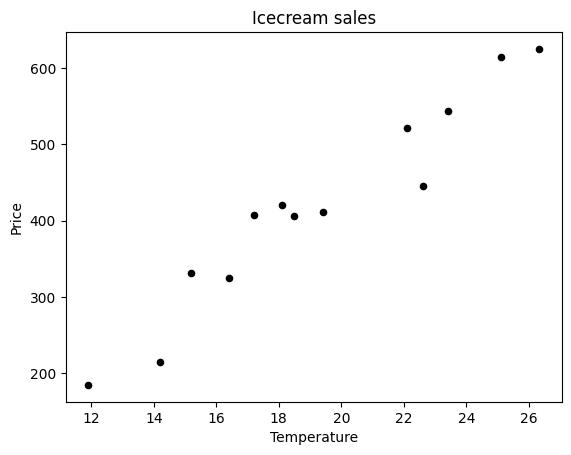

In [118]:
df_icecream.plot.scatter(title='Icecream sales', x='Temperature', y='Price',color='black')

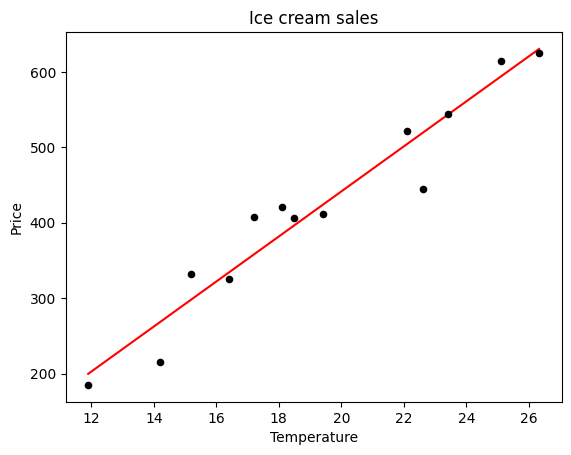

Coeficiente angular da reta: 29.85119845771622
Valor de y onde a reta intecepta o eixo y: -155.51043305891312
0.9338798595685607


In [119]:
from matplotlib import pyplot as plt
from scipy import stats

df_regression = df_icecream[['Price','Temperature']].copy()

m, b, r, p, e = stats.linregress(df_regression['Temperature'], df_regression['Price'])

df_regression['fx'] = (m*df_regression['Temperature']) + b

df_regression['error'] = df_regression['fx'] - df_regression['Temperature']

df_regression.plot.scatter(title='Ice cream sales', x='Temperature', y='Price', color='black', zorder=2)

plt.plot(df_regression['Temperature'], df_regression['fx'], color='red', zorder=1)

plt.show()

print(f"Coeficiente angular da reta: {m}\nValor de y onde a reta intecepta o eixo y: {b}")
print(r**2)


In [120]:
def predict(x):
    m = 29.85119845771622
    b = -155.51043305891312
    return m*x+b

prediction = predict(23.4)

prediction

543.0076108516464